In [1]:
from google.colab import files
uploaded = files.upload()
print(uploaded)

Saving Loan prediction (2).csv to Loan prediction (2).csv
{'Loan prediction (2).csv': b'Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status\r\nLP001002,Male,No,0,Graduate,No,5849,0,,360,1,Urban,Y\r\nLP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N\r\nLP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y\r\nLP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y\r\nLP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y\r\nLP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y\r\nLP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y\r\nLP001014,Male,Yes,3+,Graduate,No,3036,2504,158,360,0,Semiurban,N\r\nLP001018,Male,Yes,2,Graduate,No,4006,1526,168,360,1,Urban,Y\r\nLP001020,Male,Yes,1,Graduate,No,12841,10968,349,360,1,Semiurban,N\r\nLP001024,Male,Yes,2,Graduate,No,3200,700,70,360,1,Urban,Y\r\nLP001027,Male,Yes,2,Graduate,,2500,1840,109,360,1,Ur

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('Loan prediction (2).csv')
df.shape

(614, 13)

In [4]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [8]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [9]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [7]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,14


In [10]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [11]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

In [12]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [13]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [14]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [15]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [16]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [17]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

In [18]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [19]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [20]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [21]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [22]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})

In [23]:
df['Married'] = df['Married'].map({'Yes':1, 'No':0})

In [24]:
df['Education'] = df['Education'].map({'Graduate':1, 'Not Graduate':0})

In [25]:
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1, 'No':0})

In [38]:
original_loan_status = pd.read_csv('Loan prediction (2).csv')['Loan_Status']
df['Loan_Status'] = original_loan_status.replace({'Y':1, 'N':0}).astype(int)

/tmp/ipython-input-1568821030.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Loan_Status'] = original_loan_status.replace({'Y':1, 'N':0}).astype(int)


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [41]:
print('First 5 rows of X (features):')
print(X.head())
print('\nFirst 5 rows of y (target variable):')
print(y.head())

First 5 rows of X (features):
   Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0          0          1              0             5849   
1       1        1          1          1              0             4583   
2       1        1          0          1              1             3000   
3       1        1          0          0              0             2583   
4       1        0          0          1              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.000000             360.0             1.0   

  Property_Area  
0         Urban  
1         Rural  
2         Urban  
3         Urban  
4 

In [39]:
X = df.drop('Loan_Status', axis=1)

In [40]:
y = df['Loan_Status']

In [34]:
print(X.head())
print(y.head())

   Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0          0          1              0             5849   
1       1        1          1          1              0             4583   
2       1        1          0          1              1             3000   
3       1        1          0          0              0             2583   
4       1        0          0          1              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.000000             360.0             1.0   

  Property_Area  
0         Urban  
1         Rural  
2         Urban  
3         Urban  
4         Urban  
0   NaN
1   Na

In [35]:
print('First 5 rows of X (features):')
print(X.head())
print('\nFirst 5 rows of y (target variable):')
print(y.head())

First 5 rows of X (features):
   Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0          0          1              0             5849   
1       1        1          1          1              0             4583   
2       1        1          0          1              1             3000   
3       1        1          0          0              0             2583   
4       1        0          0          1              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.000000             360.0             1.0   

  Property_Area  
0         Urban  
1         Rural  
2         Urban  
3         Urban  
4 

In [32]:
X = df.drop('Loan_Status', axis=1)

In [33]:
y = df['Loan_Status']

In [29]:
X = df.drop('Loan_Status', axis=1)

In [30]:
y = df['Loan_Status']

In [44]:
df = df.drop(['Loan_ID'], axis=1, errors='ignore')

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Model Accuracy: {accuracy:.4f}')
print(f'Model Precision: {precision:.4f}')
print(f'Model Recall: {recall:.4f}')
print(f'Model F1-Score: {f1:.4f}')

Model Accuracy: 0.7886
Model Precision: 0.7596
Model Recall: 0.9875
Model F1-Score: 0.8587


In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Model Accuracy: {accuracy:.4f}')
print(f'Model Precision: {precision:.4f}')
print(f'Model Recall: {recall:.4f}')
print(f'Model F1-Score: {f1:.4f}')

Model Accuracy: 0.7886
Model Precision: 0.7596
Model Recall: 0.9875
Model F1-Score: 0.8587


In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Model Accuracy: {accuracy:.4f}')
print(f'Model Precision: {precision:.4f}')
print(f'Model Recall: {recall:.4f}')
print(f'Model F1-Score: {f1:.4f}')

Model Accuracy: 0.7886
Model Precision: 0.7596
Model Recall: 0.9875
Model F1-Score: 0.8587


In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Model Accuracy: {accuracy:.4f}')
print(f'Model Precision: {precision:.4f}')
print(f'Model Recall: {recall:.4f}')
print(f'Model F1-Score: {f1:.4f}')

Model Accuracy: 0.7886
Model Precision: 0.7596
Model Recall: 0.9875
Model F1-Score: 0.8587


In [49]:
X = pd.get_dummies(X, columns=['Property_Area'], drop_first=True, dtype=int)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [51]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [46]:
df['Dependents'] = df['Dependents'].replace('3+', '3').astype(int)

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
from sklearn.linear_model import LogisticRegression

model_scaled = LogisticRegression(max_iter=1000)
model_scaled.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_scaled = model_scaled.predict(X_test_scaled)

accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
precision_scaled = precision_score(y_test, y_pred_scaled)
recall_scaled = recall_score(y_test, y_pred_scaled)
f1_scaled = f1_score(y_test, y_pred_scaled)

print(f'Scaled Model Accuracy: {accuracy_scaled:.4f}')
print(f'Scaled Model Precision: {precision_scaled:.4f}')
print(f'Scaled Model Recall: {recall_scaled:.4f}')
print(f'Scaled Model F1-Score: {f1_scaled:.4f}')

Scaled Model Accuracy: 0.7886
Scaled Model Precision: 0.7596
Scaled Model Recall: 0.9875
Scaled Model F1-Score: 0.8587


In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
from sklearn.linear_model import LogisticRegression

model_scaled = LogisticRegression(max_iter=1000)
model_scaled.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_scaled = model_scaled.predict(X_test_scaled)

accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
precision_scaled = precision_score(y_test, y_pred_scaled)
recall_scaled = recall_score(y_test, y_pred_scaled)
f1_scaled = f1_score(y_test, y_pred_scaled)

print(f'Scaled Model Accuracy: {accuracy_scaled:.4f}')
print(f'Scaled Model Precision: {precision_scaled:.4f}')
print(f'Scaled Model Recall: {recall_scaled:.4f}')
print(f'Scaled Model F1-Score: {f1_scaled:.4f}')

Scaled Model Accuracy: 0.7886
Scaled Model Precision: 0.7596
Scaled Model Recall: 0.9875
Scaled Model F1-Score: 0.8587


In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
from sklearn.linear_model import LogisticRegression

model_scaled = LogisticRegression(max_iter=1000)
model_scaled.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_scaled = model_scaled.predict(X_test_scaled)

accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
precision_scaled = precision_score(y_test, y_pred_scaled)
recall_scaled = recall_score(y_test, y_pred_scaled)
f1_scaled = f1_score(y_test, y_pred_scaled)

print(f'Scaled Model Accuracy: {accuracy_scaled:.4f}')
print(f'Scaled Model Precision: {precision_scaled:.4f}')
print(f'Scaled Model Recall: {recall_scaled:.4f}')
print(f'Scaled Model F1-Score: {f1_scaled:.4f}')

Scaled Model Accuracy: 0.7886
Scaled Model Precision: 0.7596
Scaled Model Recall: 0.9875
Scaled Model F1-Score: 0.8587


In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
from sklearn.linear_model import LogisticRegression

model_scaled = LogisticRegression(max_iter=1000)
model_scaled.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_scaled = model_scaled.predict(X_test_scaled)

accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
precision_scaled = precision_score(y_test, y_pred_scaled)
recall_scaled = recall_score(y_test, y_pred_scaled)
f1_scaled = f1_score(y_test, y_pred_scaled)

print(f'Scaled Model Accuracy: {accuracy_scaled:.4f}')
print(f'Scaled Model Precision: {precision_scaled:.4f}')
print(f'Scaled Model Recall: {recall_scaled:.4f}')
print(f'Scaled Model F1-Score: {f1_scaled:.4f}')

Scaled Model Accuracy: 0.7886
Scaled Model Precision: 0.7596
Scaled Model Recall: 0.9875
Scaled Model F1-Score: 0.8587


In [47]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Model Accuracy: {accuracy:.4f}')
print(f'Model Precision: {precision:.4f}')
print(f'Model Recall: {recall:.4f}')
print(f'Model F1-Score: {f1:.4f}')

Model Accuracy: 0.7886
Model Precision: 0.7596
Model Recall: 0.9875
Model F1-Score: 0.8587


In [71]:
# Ensure 'Dependents' is numerical (already done but good to have context)
df['Dependents'] = df['Dependents'].replace('3+', '3').astype(int)

# Define X and y from the latest df
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Apply one-hot encoding to 'Property_Area' in X
X = pd.get_dummies(X, columns=['Property_Area'], drop_first=True, dtype=int)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit the Logistic Regression model again
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Model Accuracy: {accuracy:.4f}')
print(f'Model Precision: {precision:.4f}')
print(f'Model Recall: {recall:.4f}')
print(f'Model F1-Score: {f1:.4f}')

Model Accuracy: 0.7886
Model Precision: 0.7596
Model Recall: 0.9875
Model F1-Score: 0.8587


In [73]:
# Ensure 'Dependents' is numerical (re-executing for certainty)
df['Dependents'] = df['Dependents'].replace('3+', '3').astype(int)

# Define X and y from the latest df
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Apply one-hot encoding to 'Property_Area' in X
X = pd.get_dummies(X, columns=['Property_Area'], drop_first=True, dtype=int)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit the Logistic Regression model again
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [76]:
new_data_dict = {
    'Gender': 1, 'Married': 1, 'Dependents': 1, 'Education': 1, 'Self_Employed': 0,
    'ApplicantIncome': 5000, 'CoapplicantIncome': 0, 'LoanAmount': 150,
    'Loan_Amount_Term': 360, 'Credit_History': 1,
    'Property_Area_Semiurban': 0, 'Property_Area_Urban': 1 # Assuming Urban for this example
}

# Create a DataFrame from the new data dictionary
import pandas as pd
new_df = pd.DataFrame([new_data_dict])

# Ensure the columns are in the same order as X_train
new_df = new_df[X_train.columns]

# Make the prediction
prediction = model.predict(new_df)

print(f'Prediction for new data: {prediction[0]}')

# Optionally, you can interpret the prediction
if prediction[0] == 1:
    print("Loan Status: Approved (1)")
else:
    print("Loan Status: Not Approved (0)")

Prediction for new data: 1
Loan Status: Approved (1)


In [75]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7886178861788617


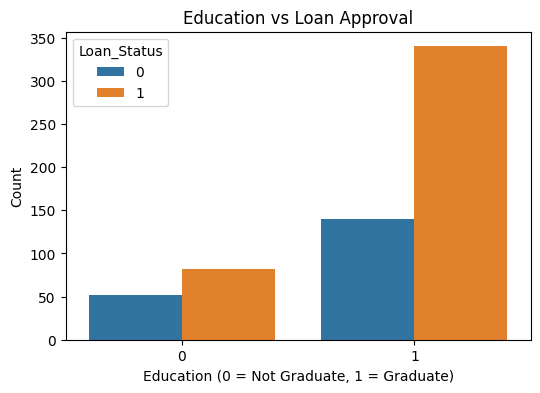

In [79]:
plt.figure(figsize=(6,4))
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title("Education vs Loan Approval")
plt.xlabel("Education (0 = Not Graduate, 1 = Graduate)")
plt.ylabel("Count")
plt.show()

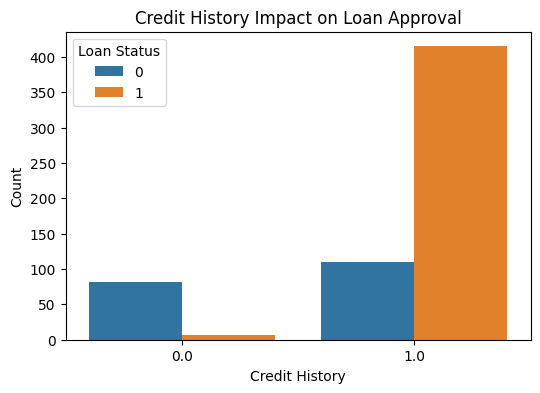

In [78]:
plt.figure(figsize=(6,4))
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title("Credit History Impact on Loan Approval")
plt.xlabel("Credit History")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()

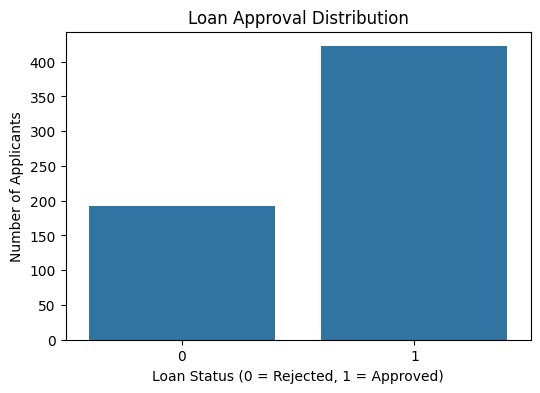

In [77]:
plt.figure(figsize=(6,4))
sns.countplot(x='Loan_Status', data=df)
plt.title("Loan Approval Distribution")
plt.xlabel("Loan Status (0 = Rejected, 1 = Approved)")
plt.ylabel("Number of Applicants")
plt.show()

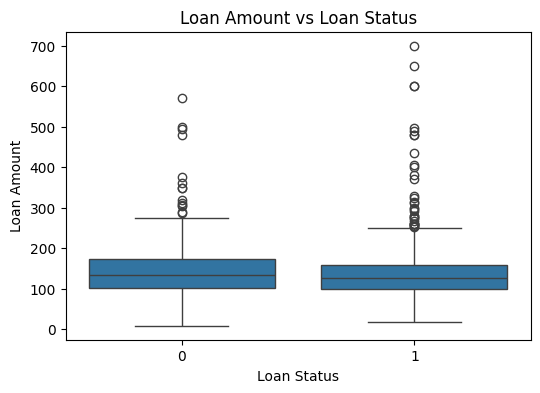

In [81]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.title("Loan Amount vs Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")
plt.show()

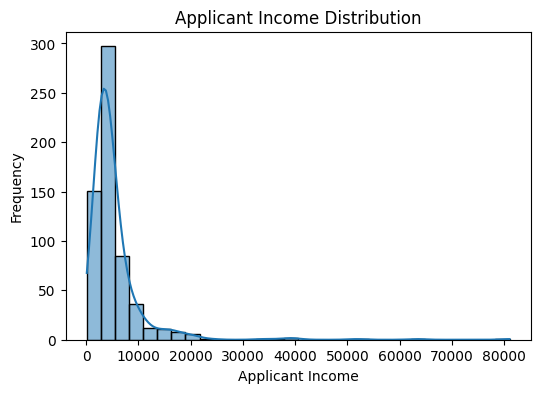

In [80]:
plt.figure(figsize=(6,4))
sns.histplot(df['ApplicantIncome'], bins=30, kde=True)
plt.title("Applicant Income Distribution")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.show()

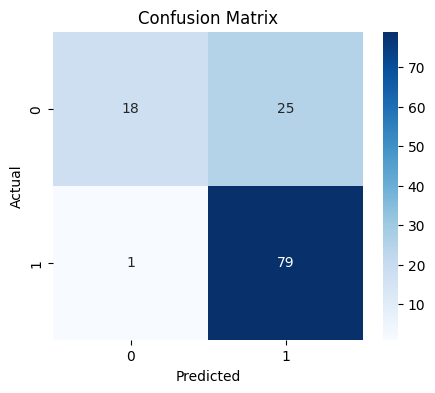

In [82]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()